# Лабораторная работа №2. Критерии согласия и однородности выборок

> Вариант № ??

**Распределения**:

X ~ ?? (объём выборки $n_x$ &mdash; ?)

Y ~ ?? (объём выборки $n_y$ &mdash; ?)

In [5]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# Немного магии для того, чтобы рисунки стали больше
import pylab
pylab.rcParams['figure.figsize'] = (24.0, 16.0)
plt.rcParams.update({'font.size': 22})

# Вспомогательные классы и функции, определённые тут же (см. репозиторий)
# https://github.com/BobNobrain/matstat-labs/tree/master/s
from s import Sample
from s.utils import table

## Задание переменных и генерация выборок

In [2]:
nx = 100
ny = 150

X = stats.norm(0, 1)
Y = stats.uniform(-1, 2)

# Пример использования класса Sample для получения выборки из заданного распределения
x = Sample.from_distribution("x", X, count=nx)
y = Sample.from_distribution("y", Y, count=ny)
# Альтернатива: X.rvs(size=nx) - массив случайных чисел из заданного распределения

# Вспомогательный метод класса s.Sample
x.describe()
y.describe()

# Отрисовка таблицы: массив заголовочных ячеек, массив строк таблицы
table(
    ['Распределение', 'Параметры', '$m$', '$\\sigma^2$'],
    [
        ['N', 'm=0, $\\sigma$=1', X.mean(), X.var()],
        ['R', 'a=-1, b=1', Y.mean(), round(Y.var(), 4)]
    ]
)

Sample x: m=0.12098092153873323, s=0.9083281090216176, s^2=0.8250599536387877
Sample y: m=-0.05981611230523027, s=0.5694790760223152, s^2=0.3243064180272298


Распределение,Параметры,$m$,$\sigma^2$
N,"m=0, $\sigma$=1",0.0,1.0
R,"a=-1, b=1",0.0,0.3333


## 1. Исходные данные

In [3]:
print('Характеристики СВ X:')

table(
    ['Распределение', 'Параметры', 'Мат. ожидание $m$', 'Дисперсия $\\sigma^2$'],
    []
)

print('Характеристики выборки x')
table(
    ['Среднее, $\\overline{x}$', 'Оценка дисперсии, $s^2$', 'Оценка с.к.о., $s$'],
    []
)

Характеристики СВ X:


Распределение,Параметры,Мат. ожидание $m$,Дисперсия $\sigma^2$


Характеристики выборки x


"Среднее, $\overline{x}$","Оценка дисперсии, $s^2$","Оценка с.к.о., $s$"


## 2. Визуальное представление выборки

Гистограммы частот для $n_{bins} \in \{5, 10, 15, n_{my}\}$ (выберите $n_{my}$ сами):

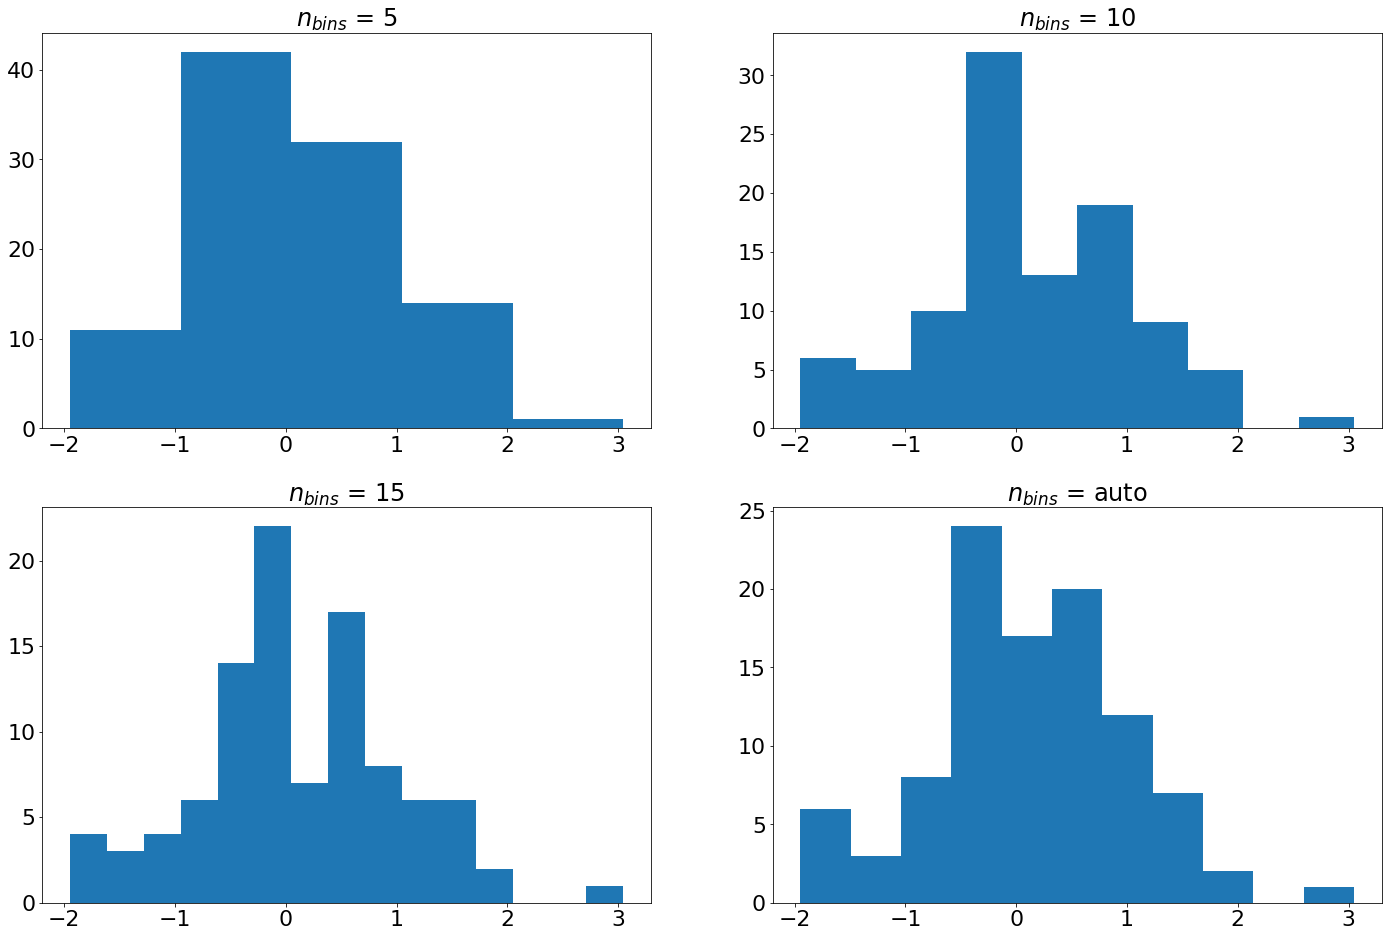

In [6]:
n_my = 'auto' # TODO: выбрать число
fig, axs = plt.subplots(2,2)

n_bins_values = [5, 10, 15, n_my]

for i in range(4):
    n_bins = n_bins_values[i]
    picture = axs[i // 2][i % 2]
    picture.hist(x.data(), bins=n_bins)
    picture.set_title('$n_{bins}$ = {}'.format(n_bins, bins='{bins}'), fontsize=24)

## 3. Критерий хи-квадрат

*а)* Статистическая гипотеза $H_0: X \sim N$

In [9]:
from s import Pierson1SampledHyp

alpha = 0.01
my_n = 'Выбрать n'

proposed_dist = stats.norm(X.mean(), X.var())

def table_row(n):
    start = -3.
    end = 3.
    step = (end - start) / n
    
    h0 = Pierson1SampledHyp(
        bins=np.arange(start, end + step, step),
        unknown_params_n=2
    )
    criterion_v, critical_v, p_v, passed = h0.full_test(dist=proposed_dist, sample=x, alpha=alpha)
    decision = 'H0' if passed else 'H1'
    return [n, round(criterion_v, 4), round(p_v, 4), decision, 'Посчитайте сами']

table(
    [
        'Число интервалов группировки',
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha$ = {}'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        table_row(5),
        table_row(10),
        table_row(15),
        [my_n, '', '', '', '']
    ]
)

Число интервалов группировки,Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha$ = 0.01,Ошибка статистического решения
5,10.0732,0.0065,H1,Посчитайте сами
10,16.8438,0.0184,H0,Посчитайте сами
15,15.3498,0.2229,H0,Посчитайте сами
Выбрать n,,,,


---

*б)* Статистическая гипотеза $H_0: X \sim R$

In [6]:
alpha = 0.01
my_n = 'Выбрать n'

table(
    [
        'Число интервалов группировки',
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha$ = {}'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        [5, '', '', '', ''],
        [10, '', '', '', ''],
        [15, '', '', '', ''],
        [my_n, '', '', '', '']
    ]
)

Число интервалов группировки,Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha$ = 0.01,Ошибка статистического решения
5,,,,
10,,,,
15,,,,
Выбрать n,,,,


---

*в)* Статистическая гипотеза $H_0: X \sim \chi^2(5)$

In [7]:
alpha = 0.01
my_n = 'Выбрать n'

table(
    [
        'Число интервалов группировки',
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha$ = {}'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        [5, '', '', '', ''],
        [10, '', '', '', ''],
        [15, '', '', '', ''],
        [my_n, '', '', '', '']
    ]
)

Число интервалов группировки,Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha$ = 0.01,Ошибка статистического решения
5,,,,
10,,,,
15,,,,
Выбрать n,,,,


## 4. Критерий Колмогорова

In [8]:
alpha = 0.01

table(
    [
        'Статистическая гипотеза $H_0$',
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha$ = {}'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        ['$X \\sim N(m, \\sigma)$', '', '', '', ''],
        ['$X \\sim R$', '', '', '', ''],
        ['$X \\sim \\chi^2(5)$', '', '', '', '']
    ]
)

Статистическая гипотеза $H_0$,Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha$ = 0.01,Ошибка статистического решения
"$X \sim N(m, \sigma)$",,,,
$X \sim R$,,,,
$X \sim \chi^2(5)$,,,,


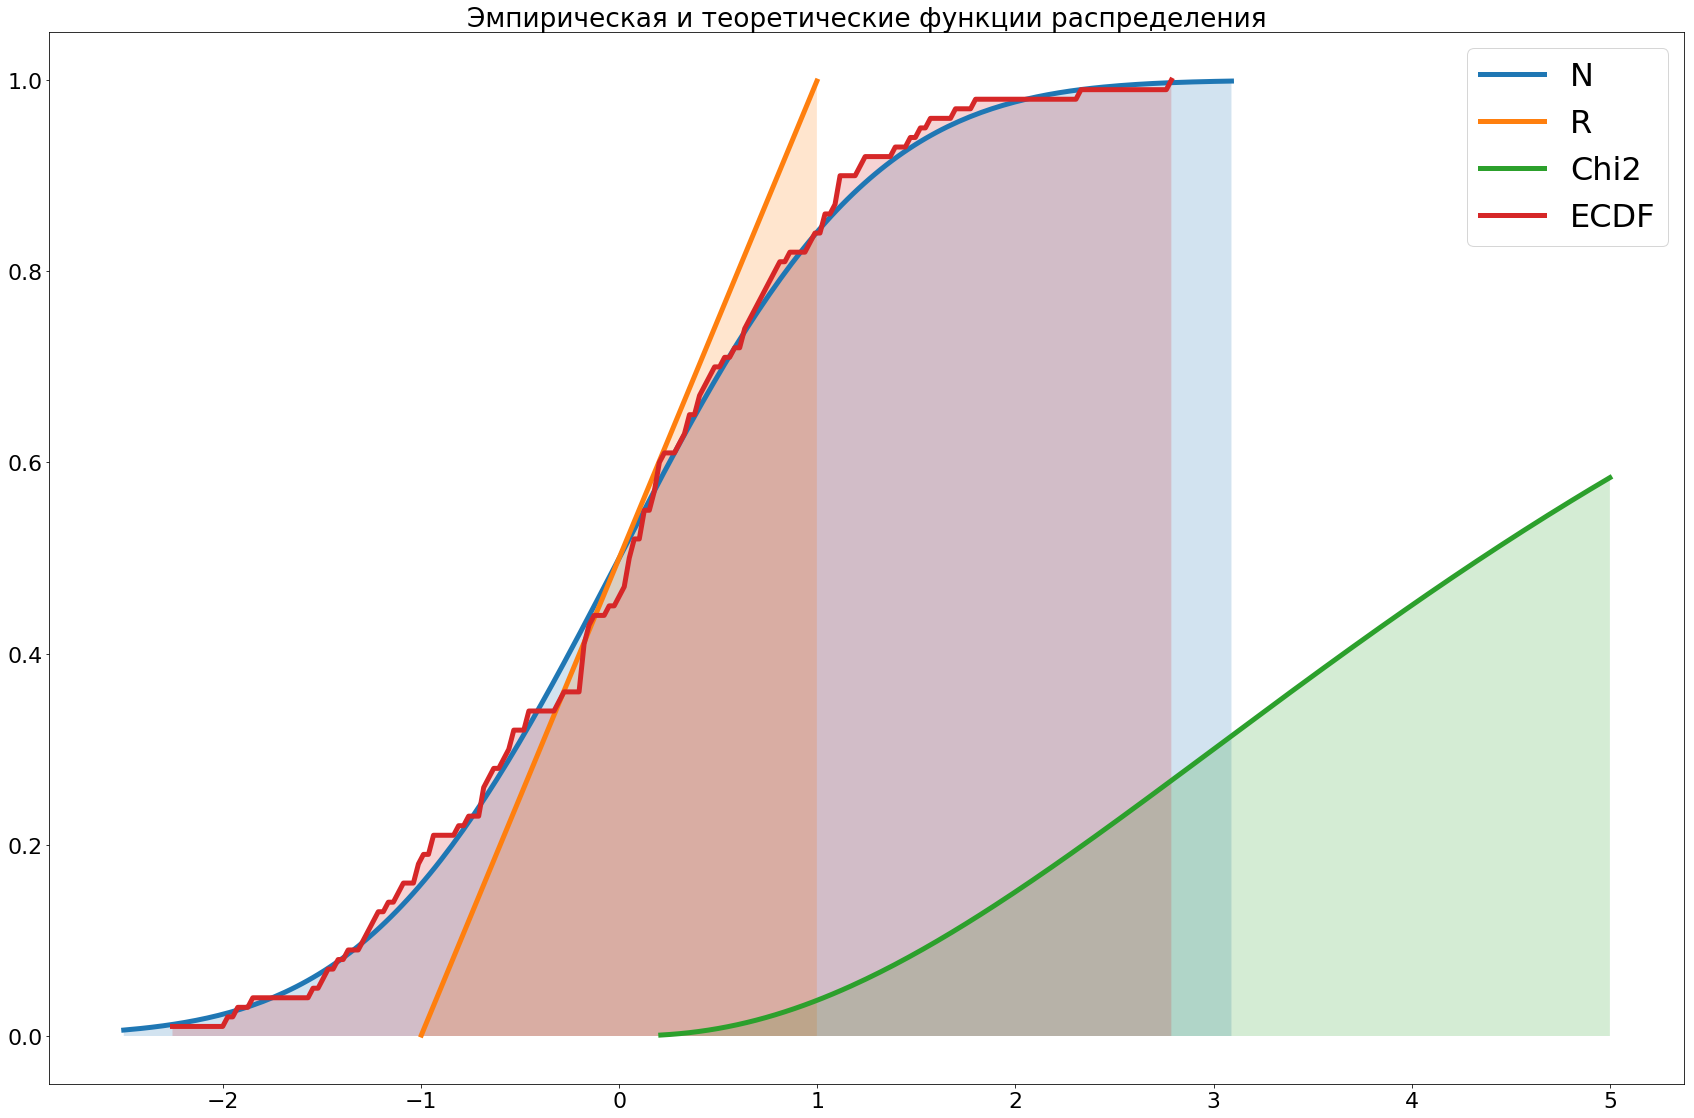

In [31]:
h0_distributions = [
    ('N', stats.norm(0, 1)),
    ('R', stats.uniform(-1, 2)),
    ('Chi2', stats.chi2(5))
]


fig, ax = plt.subplots()
ax.set_title('Эмпирическая и теоретические функции распределения')

for name, dist in h0_distributions:
    domain = np.linspace(
        max(-2.5, dist.ppf(0.001)),
        min(5, dist.ppf(0.999)),
        200
    )
    values = dist.cdf(domain)
    ax.plot(domain, values, lw=5, label=name)
    ax.fill_between(domain, 0, values, alpha=.2)
    
ecdf = ECDF(x.data())
domain = np.linspace(x.min(), x.max(), x.n() * 2)
values = ecdf(domain)
ax.plot(domain, values, lw=5, label='ECDF')
ax.fill_between(domain, 0, values, alpha=.2)

ax.legend(prop={'size': 32})
    
fig.tight_layout()
plt.show()

# 5. Двухвыборочные критерии

In [10]:
print('Характеристики СВ Y:')
table(
    ['Распределение', 'Параметры', 'Мат. ожидание $m$', 'Дисперсия $\\sigma^2$'],
    []
)

print('Характеристики выборки y')
table(
    ['Среднее, $\\overline{x}$', 'Оценка дисперсии, $s^2$', 'Оценка с.к.о., $s$'],
    []
)

Характеристики СВ Y:


Распределение,Параметры,Мат. ожидание $m$,Дисперсия $\sigma^2$


Характеристики выборки y


"Среднее, $\overline{x}$","Оценка дисперсии, $s^2$","Оценка с.к.о., $s$"


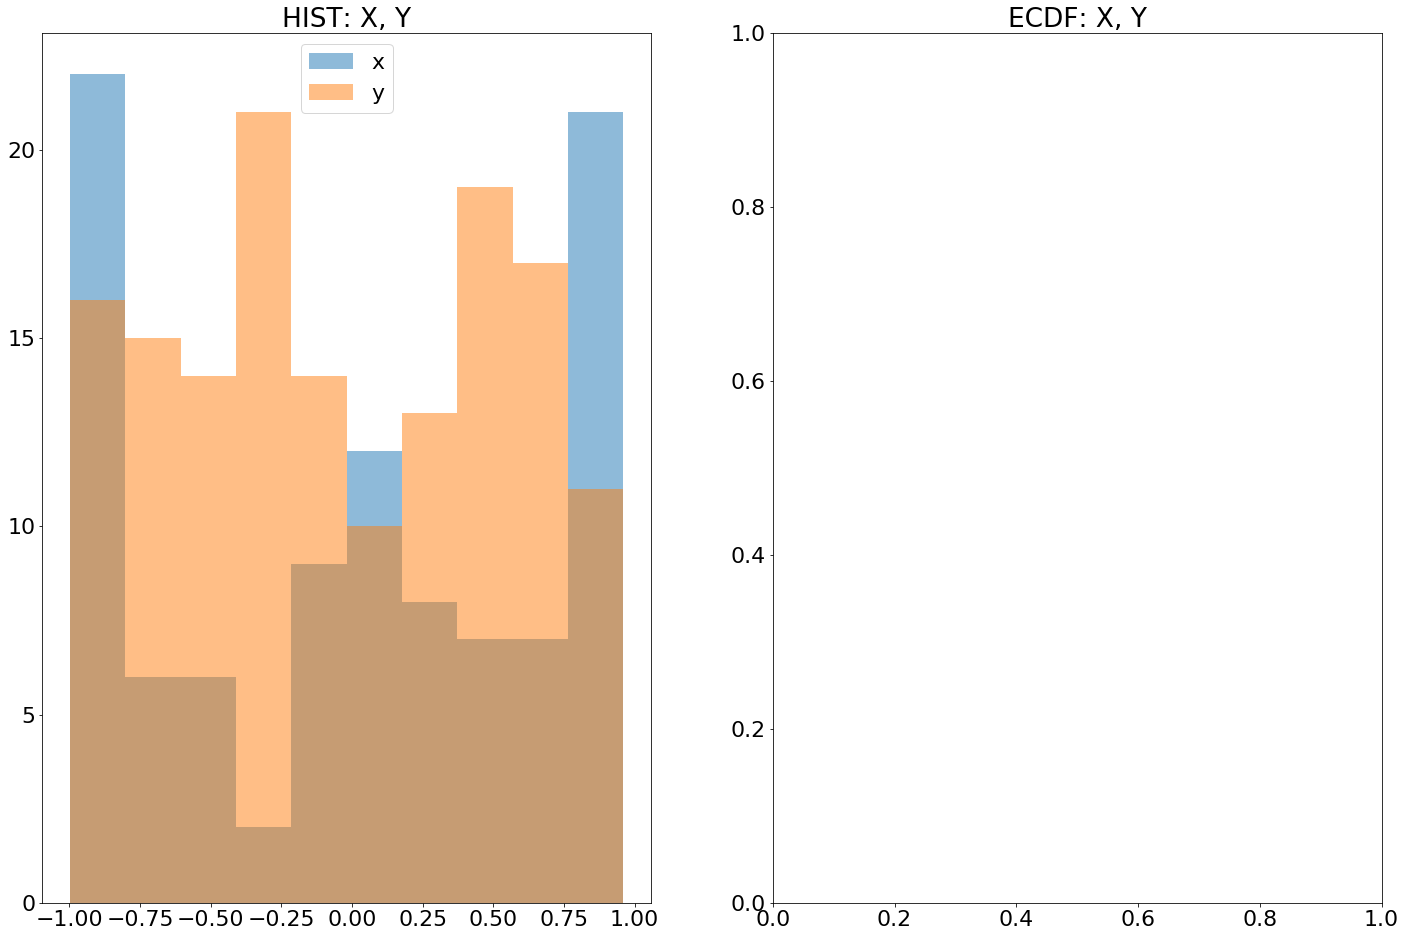

In [28]:
fig, ax = plt.subplots(1, 2)

left_plot = ax[0]
right_plot = ax[1]

min_val = max(x.min(), y.min())
max_val = min(x.max(), y.max())
clipped_x = np.clip(x.data(), min_val, max_val)
clipped_y = np.clip(y.data(), min_val, max_val)

left_plot.set_title('HIST: X, Y')
left_plot.hist(clipped_x, bins=10, label='x', alpha=.5)
left_plot.hist(clipped_y, bins=10, label='y', alpha=.5)
left_plot.legend()


right_plot.set_title('ECDF: X, Y');

# TODO: ECDF

In [12]:
alpha = 0.01

table(
    [
        'Критерий',
        'Статистическая гипотеза $H_0$',
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha$ = {}'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        ['Chi-squared', '', '', '', '', ''],
        ['KS-test', '', '', '', '', ''],
        ['Sign test', '', '', '', '', ''],
        ['U-test', '', '', '', '', '']
    ]
)

Критерий,Статистическая гипотеза $H_0$,Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha$ = 0.01,Ошибка статистического решения
Chi-squared,,,,,
KS-test,,,,,
Sign test,,,,,
U-test,,,,,
